In [2]:
!pip install numpy
!pip install pandas

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.8 MB 3.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.6/12.8 MB 3.0 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/12.8 MB 3.2 MB/s eta 0:00:04
   --------- ------------------------------ 3.1/12.8 MB 3.3 MB/s eta 0:00:03
   ------------ --------------------------- 3.9/12.8 MB 3.4 MB/s eta 0:00:03
   --------------- ------------------------ 5.0/12.8 MB 3.6 MB/s eta 0:00:03
   ------------------ --------------------- 5.8/12.8 MB 3.6 MB/s eta 0:00:02
   --------------------- ------------------ 6.8/12.8 MB 3.8 MB/s eta 0:00:02
   ----------------------- ---------------- 7.6/12.8 MB 3.8 MB/s eta 0:00:02
   --------------------------- ------------ 8.7/12.8 MB 4.0 MB/s eta 0:00:02
   ------------------------------ --------- 9.7/12.8 MB 4.0 MB/s eta 0:00:01
   ----------

In [3]:
import pandas as pd
import numpy as np

In [4]:
path = './Data/AmesHousing.csv'

df = pd.read_csv(path, delimiter=',')

In [14]:
random_state = 42

# Capitulo 1

Nos encontramos con un 

In [5]:
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Edad'], df['Resistencia'], color='blue', edgecolor='k')
plt.title('Diagrama de dispersión: Resistencia al corte vs Edad del propelente')
plt.xlabel('Edad del propelente (semanas)')
plt.ylabel('Resistencia al corte (psi)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
n = len(df)

Sxx = np.sum(df["Edad"]**2) - (np.sum(df["Edad"])**2) / n
Sxy = np.sum(df["Edad"] * df["Resistencia"]) - (np.sum(df["Edad"]) * np.sum(df["Resistencia"])) / n

b1 = Sxy / Sxx
b0 = df["Resistencia"].mean() - b1 * df["Edad"].mean()

# Predicciones y residuos
df["y_hat"] = b0 + b1 * df["Edad"]
df["Residuo"] = df["Resistencia"] - df["y_hat"]

# Redondear resultados a dos decimales
df_rounded = df.round(2)

# Resultados numéricos
print(f"Sxx = {Sxx:.2f}")
print(f"Sxy = {Sxy:.2f}")
print(f"Pendiente (β1) = {b1:.2f}")
print(f"Intercepto (β0) = {b0:.2f}")
print("\nModelo ajustado:")
print(f"ŷ = {b0:.2f} - {abs(b1):.2f}x")

# Mostrar tabla final
print("\nTabla de valores observados, estimados y residuos")
df_rounded[["Resistencia", "y_hat", "Residuo"]]

In [ ]:
# === Modelo de regresión lineal ===
modelo = smf.ols('Resistencia ~ Edad', data=df).fit()

# Resumen del modelo
print(modelo.summary())

# ANOVA del modelo
anova = sm.stats.anova_lm(modelo, typ=2)
print("\nANOVA del modelo:\n", anova)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Cálculos manuales para estimar σ²
print("=== CÁLCULO MANUAL DE σ² ===")

# 1. Calcular SST - Suma Total de Cuadrados
n = len(df)
sum_yi_cuad = (df['Resistencia'] ** 2).sum()
sum_yi = df['Resistencia'].sum()

print(f"n = {n}")
print(f"∑y_i² = {sum_yi_cuad:.2f}")
print(f"∑y_i = {sum_yi:.2f}")

SST = sum_yi_cuad - (sum_yi ** 2) / n
print(f"\nSST = ∑y_i² - (∑y_i)²/n")
print(f"SST = {sum_yi_cuad:.2f} - ({sum_yi:.2f})²/{n}")
print(f"SST = {SST:.2f}")

# 2. Calcular Sxy - Covarianza muestral
x = df['Edad']
y = df['Resistencia']
Sxy = (x * y).sum() - (x.sum() * y.sum()) / n
print(f"\nSxy = ∑x_i*y_i - (∑x_i)(∑y_i)/n")
print(f"Sxy = {(x * y).sum():.2f} - ({x.sum():.2f})({y.sum():.2f})/{n}")
print(f"Sxy = {Sxy:.2f}")

# 3. Calcular β1_hat (coeficiente de pendiente)
Sxx = ((x - x.mean()) ** 2).sum()
beta1_hat = Sxy / Sxx
print(f"\nβ1_hat = Sxy / Sxx")
print(f"β1_hat = {Sxy:.2f} / {Sxx:.2f}")
print(f"β1_hat = {beta1_hat:.2f}")

# 4. Calcular SS_Res - Suma de Cuadrados Residual
SS_Res = SST - beta1_hat * Sxy
print(f"\nSS_Res = SST - β1_hat * Sxy")
print(f"SS_Res = {SST:.2f} - ({beta1_hat:.2f}) * ({Sxy:.2f})")
print(f"SS_Res = {SS_Res:.2f}")

# 5. Calcular σ²_hat - Estimación de la varianza
sigma2_hat = SS_Res / (n - 2)
print(f"\nσ²_hat = SS_Res / (n - 2)")
print(f"σ²_hat = {SS_Res:.2f} / ({n} - 2)")
print(f"σ²_hat = {sigma2_hat:.2f}")

print(f"\n=== RESULTADO FINAL ===")
print(f"Estimación de σ² = {sigma2_hat:.2f}")

In [ ]:
=== CÁLCULO MANUAL DE σ² ===
n = 20
∑y_i² = 92547433.46
∑y_i = 42627.15

SST = ∑y_i² - (∑y_i)²/n
SST = 92547433.46 - (42627.15)²/20
SST = 1693737.60

Sxy = ∑x_i*y_i - (∑x_i)(∑y_i)/n
Sxy = 528492.64 - (267.25)(42627.15)/20
Sxy = -41112.65

β1_hat = Sxy / Sxx
β1_hat = -41112.65 / 1106.56
β1_hat = -37.15

SS_Res = SST - β1_hat * Sxy
SS_Res = 1693737.60 - (-37.15) * (-41112.65)
SS_Res = 166254.86

σ²_hat = SS_Res / (n - 2)
σ²_hat = 166254.86 / (20 - 2)
σ²_hat = 9236.38

=== RESULTADO FINAL ===
Estimación de σ² = 9236.38

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Ajustar el modelo de regresión lineal
modelo_formula = smf.ols('Resistencia ~ Edad', data=df).fit()

# Obtener el resumen del modelo y ANOVA
resumen_formula = modelo_formula.summary()
anova_formula = sm.stats.anova_lm(modelo_formula, typ=2)

# Mostrar resultados
print("RESUMEN DEL MODELO DE REGRESIÓN:")
print(resumen_formula)
print("\nANÁLISIS DE VARIANZA (ANOVA):")
print(anova_formula)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# ================================
# 1. Datos: 
# Tenemos 20 observaciones del experimento con propulsores de cohete.
# La variable "edad" es el tiempo en semanas, y la variable "resistencia" 
# es la resistencia al corte en psi.
# ================================
edad = np.array([15.5, 23.75, 8.0, 17.0, 5.5,
                 19.0, 24.0, 2.5, 7.5, 11.0,
                 13.0, 3.75, 25.0, 9.75, 22.0,
                 18.0, 6.0, 12.5, 2.0, 21.5])

resistencia = np.array([2158.70, 1678.15, 2316.00, 2061.30, 2207.50,
                        1708.30, 1784.70, 2575.00, 2357.90, 2256.70,
                        2165.20, 2399.55, 1779.80, 2336.75, 1765.30,
                        2053.50, 2414.40, 2200.50, 2654.20, 1753.70])

# ================================
# 2. Ajustar modelo de regresión lineal
# Usamos statsmodels para ajustar una regresión lineal simple:
# Resistencia = β0 + β1 * Edad + error
# ================================
X = sm.add_constant(edad)   # agrega una columna de 1s (para el intercepto β0)
modelo = sm.OLS(resistencia, X).fit()

# Resumen con parámetros, errores estándar, R^2, etc.
print(modelo.summary())

# ================================
# 3. Intervalo de confianza para β1 (pendiente)
# Según la teoría: 
#   IC(β1) = β1_hat ± t_(α/2, n-2) * se(β1_hat)
# Aquí: n=20 ⇒ grados de libertad = n-2 = 18
# ================================
beta1_hat = modelo.params[1]      # estimación de la pendiente β1
se_beta1 = modelo.bse[1]          # error estándar de β1
n = len(edad)
gl = n - 2                        # grados de libertad (n - 2 porque hay β0 y β1)
t_crit = stats.t.ppf(1-0.025, df=gl)  # valor crítico t para 95%

# Construcción del intervalo de confianza para β1
ic_beta1 = (beta1_hat - t_crit*se_beta1,
            beta1_hat + t_crit*se_beta1)

print(f"β1 estimado = {beta1_hat:.2f}")  # debería ser ≈ -37.15 
print(f"IC 95% para β1: {ic_beta1}")     # debería ser ≈ [-43.22, -31.08] 

# ================================
# 4. Intervalo de confianza para σ^2
# Según la teoría: 
#   IC(σ^2) = [(SSE / χ²_(α/2, n-2)), (SSE / χ²_(1-α/2, n-2))]
# donde SSE = suma de cuadrados de los residuos.
# ================================
SSE = sum(modelo.resid**2)  # suma de cuadrados de los errores
chi2_inf = stats.chi2.ppf(0.975, df=gl)   # χ²_(α/2, gl) con α=0.05
chi2_sup = stats.chi2.ppf(0.025, df=gl)   # χ²_(1-α/2, gl)

# Construcción del intervalo de confianza para σ^2
ic_sigma2 = (SSE/chi2_inf, SSE/chi2_sup)

print(f"IC 95% para σ^2: {ic_sigma2}")    # debería ser ≈ [5282.62, 20219.03]

In [10]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# =============================
# 1. Cargar dataset
# =============================
df = pd.read_csv("../Data/AmesHousing.csv")

# Seleccionar variables predictoras
X = df[['Gr Liv Area', 'Overall Qual', 'Year Built', 'Garage Area', '1st Flr SF', 'SalePrice']].dropna()

Y = X['SalePrice']

X = X.drop('SalePrice', axis =1)

# Agregar constante para el modelo
X = sm.add_constant(X)


In [11]:
from statsmodels.regression.linear_model import OLS

model = OLS(Y,X)
result = model.fit()

In [12]:
fitted_vals = result.fittedvalues
residuals = result.resid

C:\Users\Work\miniconda3\envs\project-env\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


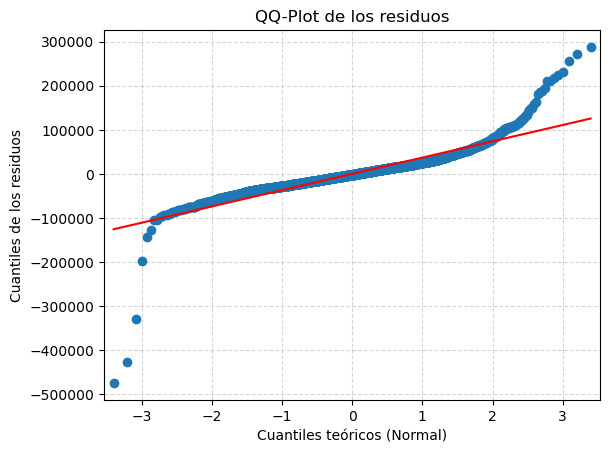

In [13]:
# =============================
# 4. QQ Plot para evaluar normalidad
# =============================
sm.qqplot(residuals, line='s', color='blue')
plt.title("QQ-Plot de los residuos")
plt.xlabel("Cuantiles teóricos (Normal)")
plt.ylabel("Cuantiles de los residuos")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()